In [91]:
pip install pandas numpy


In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [569]:
file_path = r"C:\Users\bhavi\Downloads\Vrinda Store Data Analysis.xlsx"


In [570]:
df = pd.read_excel(file_path)

In [571]:
null_values = df.isnull().sum()
print("Null values in the DataFrame:")
print(null_values)

Null values in the DataFrame:
index               0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Date                0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
dtype: int64


In [572]:
def assign_Age_bracket(Age):
    if Age >= 50:
        return "Old Age"
    elif Age >= 30:
        return "Middle Age"
    else:
        return "Adolescent"

df['Age_bracket'] = df['Age'].apply(assign_age_bracket)

In [573]:
df['Gender'] = df['Gender'].replace({'W': 'Women', 'M': 'Men'})
df['Qty'] = df['Qty'].replace({'One':1, 'Two': 2})

In [574]:
print("\nDataFrame with age brackets and renamed gender values:")
print(df[['Age', 'Age_bracket', 'Gender' ,'Qty']].head())


DataFrame with age brackets and renamed gender values:
   Age Age_bracket Gender  Qty
0   44  Middle Age  Women    1
1   29  Adolescent  Women    1
2   67     Old Age  Women    1
3   20  Adolescent  Women    1
4   62     Old Age  Women    1


In [575]:
qty_value_counts = df['Gender'].value_counts()
print(qty_value_counts)

Gender
Women    21553
Men       9494
Name: count, dtype: int64


In [576]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%b')

In [577]:
df.head()

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Age_bracket,Month
0,1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,...,1,INR,376,MOHALI,PUNJAB,140301,IN,False,Middle Age,Dec
1,2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,...,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False,Adolescent,Dec
2,3,171-1641533-8921966,1641533,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,...,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False,Old Age,Dec
3,4,404-7490807-6300351,7490807,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,...,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False,Adolescent,Dec
4,5,403-9293516-4577154,9293516,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,...,1,INR,544,GURUGRAM,HARYANA,122001,IN,False,Old Age,Dec


In [578]:
pivot_table = pd.pivot_table(df, index='Month', values=['Amount', 'Order ID'], 
                             aggfunc={'Amount': 'sum', 'Order ID': 'count'}, margins=True )

In [579]:
pivot_table

,Amount,Order ID
Month,,
Apr,1829263,2685
Aug,1808505,2617
Dec,1622033,2384
Feb,1875932,2750
Jan,1820601,2702
Jul,1772300,2579
Jun,1750966,2597
Mar,1928066,2819
May,1797822,2617


In [580]:
desired_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_table_sorted = pivot_table.reindex(desired_order)
print(pivot_table_sorted)


        Amount  Order ID
Month                   
Jan    1820601      2702
Feb    1875932      2750
Mar    1928066      2819
Apr    1829263      2685
May    1797822      2617
Jun    1750966      2597
Jul    1772300      2579
Aug    1808505      2617
Sep    1688871      2490
Oct    1666662      2424
Nov    1615356      2383
Dec    1622033      2384


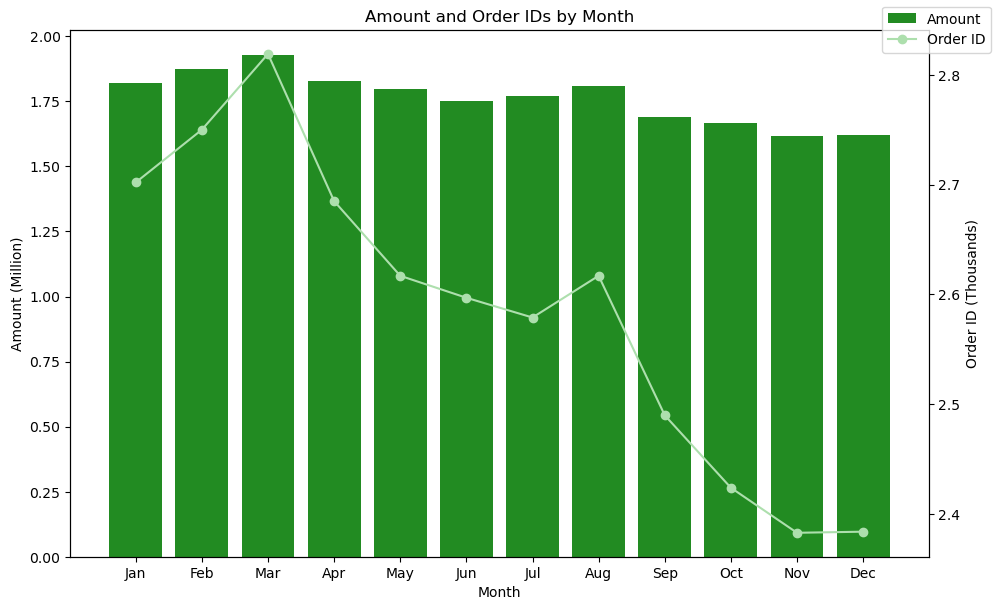

In [581]:
forest_green = '#228B22'
moss_green = '#ADDFAD'    
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Month')
ax1.set_ylabel('Amount (Million)', color='black')
ax1.bar(pivot_table_sorted.index, pivot_table_sorted['Amount'] / 1000000, color=forest_green, label='Amount')
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  
ax2.set_ylabel('Order ID (Thousands)', color='black')  
ax2.plot(pivot_table_sorted.index, pivot_table_sorted['Order ID'] / 1000, color=moss_green, marker='o', label='Order ID')
ax2.tick_params(axis='y', labelcolor='black')
fig.tight_layout()
fig.legend(loc='upper right')

plt.title('Amount and Order IDs by Month')
plt.savefig('Amount and Order IDs by Month.png')
plt.show()

In [582]:
pivot_table = pd.pivot_table(df, index='Gender', values='Amount', aggfunc='sum')
pivot_table

,Amount
Gender,
Men,7613604
Women,13562773


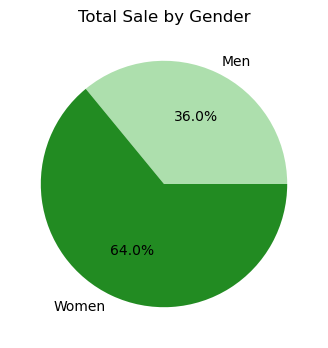

In [583]:
plt.figure(figsize=(6, 4))
plt.pie(pivot_table['Amount'], labels=pivot_table.index, autopct='%1.1f%%', colors=[moss_green, forest_green])
plt.title('Total Sale by Gender')
plt.savefig('Total Sale by Gender.png')
plt.show()

In [584]:
pivot_table = pd.pivot_table(df, index='Status', values='Order ID', aggfunc='count')
pivot_table

,Order ID
Status,
Cancelled,844
Delivered,28641
Refunded,517
Returned,1045


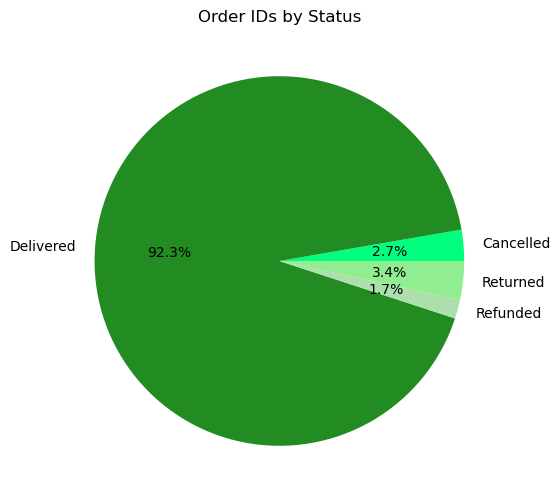

In [585]:
custom_colors = {'Delivered':'#228B22',  
                 'Pending': '#32CD32',  
                 'Cancelled':'#00FF7F', 
                 'Returned': '#90EE90'} 
plt.figure(figsize=(6, 6))
plt.pie(pivot_table['Order ID'], labels=pivot_table.index, autopct='%1.1f%%', colors=[custom_colors.get(status, moss_green) for status in pivot_table.index])
plt.title('Order IDs by Status')
plt.savefig('Order IDs by Status.png')
plt.show()

In [586]:
df.head()

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Age_bracket,Month
0,1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,...,1,INR,376,MOHALI,PUNJAB,140301,IN,False,Middle Age,Dec
1,2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,...,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False,Adolescent,Dec
2,3,171-1641533-8921966,1641533,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,...,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False,Old Age,Dec
3,4,404-7490807-6300351,7490807,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,...,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False,Adolescent,Dec
4,5,403-9293516-4577154,9293516,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,...,1,INR,544,GURUGRAM,HARYANA,122001,IN,False,Old Age,Dec


In [587]:
pivot_table = pd.pivot_table(df, index='ship-state', values='Amount', aggfunc='sum')
top_5_states = pivot_table.sort_values(by='Amount', ascending=False).head(5)
print(top_5_states)

                Amount
ship-state            
MAHARASHTRA    2990221
KARNATAKA      2646358
UTTAR PRADESH  2104659
TELANGANA      1712439
TAMIL NADU     1678877


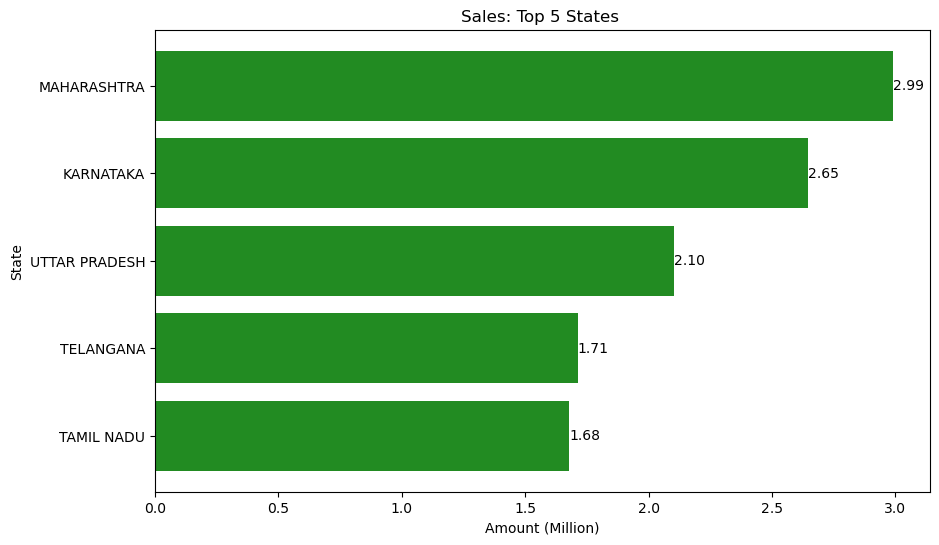

In [588]:
top_5_states['Amount'] /= 1000000
plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_states.index, top_5_states['Amount'], color='forestgreen')
for index, value in enumerate(top_5_states['Amount']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', color='black')

plt.xlabel('Amount (Million)')
plt.ylabel('State')
plt.title('Sales: Top 5 States ')
plt.gca().invert_yaxis() 
plt.savefig('Sales.png')
plt.show()

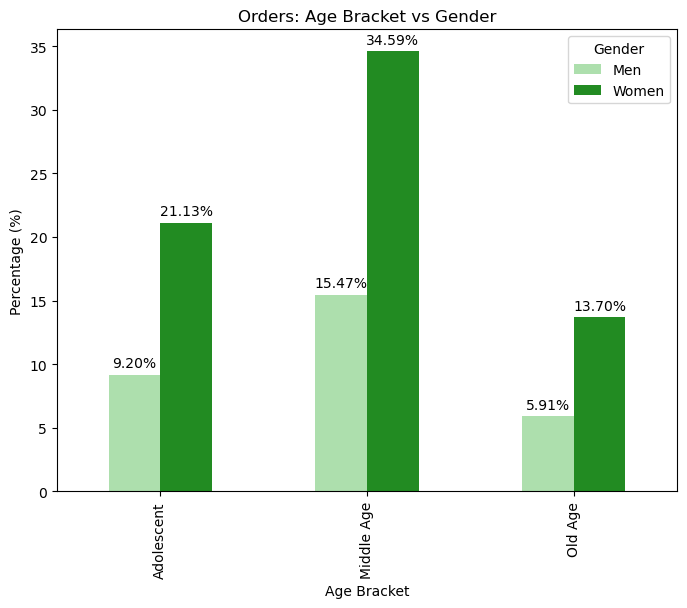

In [589]:
pivot_table = pd.pivot_table(df, index='Age_bracket', columns='Gender', values='Order ID', aggfunc='count', fill_value=0)
grand_total = pivot_table.values.sum()
pivot_table_percentage = (pivot_table / grand_total) * 100
colors = {'Men': '#ADDFAD',  
          'Women': '#228B22'} 
ax = pivot_table_percentage.plot(kind='bar', figsize=(8, 6), color=[colors[col] for col in pivot_table_percentage.columns])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.title('Orders: Age Bracket vs Gender')
plt.xlabel('Age Bracket')
plt.ylabel('Percentage (%)')
plt.legend(title='Gender')
plt.savefig('Orders.png')
plt.show()

In [590]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Age_bracket', 'Month'],
      dtype='object')

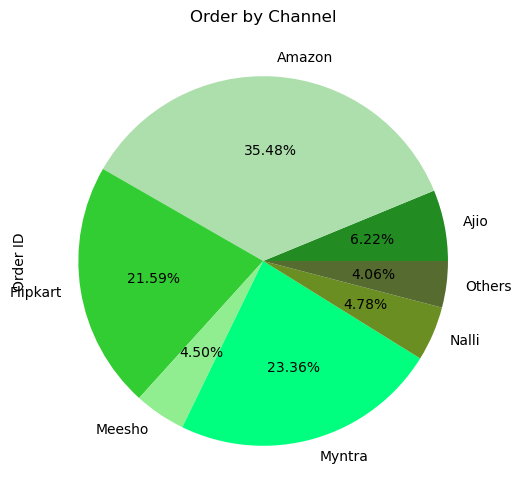

In [591]:
pivot_table = pd.pivot_table(df, index='Channel ', values='Order ID', aggfunc='count')
grand_total = pivot_table['Order ID'].sum()
pivot_table_percentage = (pivot_table / grand_total) * 100
custom_colors = ['#228B22', '#ADDFAD', '#32CD32', '#90EE90', '#00FF7F', '#6B8E23', '#556B2F']
ax = pivot_table_percentage.plot(kind='pie', y='Order ID', autopct='%1.2f%%', colors=custom_colors, figsize=(10, 6), legend=False)
plt.title('Order by Channel')

plt.savefig('Channel.png')
plt.show()